Exploratory Data Analysis

EDA | Hotels in Delhi, India Dataset

Berikut adalah tahapan yang dilakukan dalam Exploratory Data Analysis (EDA) dari dataset Delhi:

BUSINESS UNDERSTANDING

Kumpulan dataset ini berisi informasi tentang hotel di Delhi, India yang dimana berisi Hotel Name, Rating, Rating Description, Reviews, Star Rating, Location, Nearest Landmark, Distance to Landmark, Price, dan Tax. penelitian ini bertujuan untuk memahami faktor-faktor utama yang memengaruhi keputusan pelanggan dalam memilih hotel di Delhi, terutama berdasarkan harga, lokasi, dan rating ulasan. Permasalahan dalam analisis ini yaitu bagaimana mengidentifikasi elemen-elemen spesifik yang memengaruhi persepsi pelanggan dalam memilih hotel di Delhi. Apakah harga yang lebih terjangkau menjadi faktor utama? Apakah rating ulasan yang tinggi lebih penting? Dengan begitu, strategi pemasaran dapat disesuaikan untuk meningkatkan pengalaman pelanggan dan daya saing di pasar perhotelan yang kompetitif.

1. Mengimpor Library yang Dibutuhkan

Langkah pertama adalah mengimpor Library Python yang relevan, seperti:

- Pandas: untuk memproses dan menganalisis data.
- Matplotlib dan Seaborn: untuk membuat visualisasi grafik.

In [34]:
#Impor Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Untuk menampilkan semua kolom sampai 200
pd.set_option('display.max_columns', 200) 

# Mengatur gaya plot untuk visualisasi yang konsisten
plt.style.use('ggplot')

2. Memuat dan Memeriksa Dataset

Memuat dataset ke dalam Python menggunakan pandas.read_excel() dan melakukan pemeriksaan awal:

- data.info(): Menampilkan informasi tentang jumlah kolom, baris, tipe data, dan apakah ada nilai yang hilang.
- data.head(): Menampilkan beberapa baris pertama untuk melihat bagaimana data tersusun.

In [35]:
# Memuat dataset
file_path = 'delhi.xlsx'
data = pd.read_excel(file_path)

In [36]:
# Melihat banyak baris dan kolom dalam dataset
data.shape

(101, 10)

In [37]:
# Melihat beberapa baris pertama dataset
data.head()

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,"Country Inn and Suites by Radisson, Sahibabad",4.2,Very Good,15697,5.0,In Ghaziabad,Delhi city centre,30.0 km,6249,NaN
1,Radisson Blu Kaushambi Delhi NCR,4.0,Very Good,1826,5.0,In Ghaziabad,Delhi city centre,28.0 km,5039,605.0
2,The Ashok,3.8,Very Good,5694,5.0,Chanakyapuri,T1 - Delhi Airport (IGI Airport),9.8 km,6288,NaN
3,Pride Plaza Hotel Aerocity New Delhi,4.0,Very Good,7275,5.0,Aerocity,Indira Gandhi International Airport,4.0 km,6499,780.0
4,"Golden Tulip Vasundhara Hotel & Suites, Delhi NCR",3.9,Very Good,2057,4.0,In Ghaziabad,Delhi city centre,31.0 km,3386,871.0


3. Gambaran Umum Dataset

Sebelum melakukan analisis lebih rinci, penting untuk memahami struktur dataset.

In [38]:
# Informasi dasar tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            101 non-null    object 
 1   Rating                101 non-null    float64
 2   Rating Description    101 non-null    object 
 3   Reviews               101 non-null    int64  
 4   Star Rating           89 non-null     float64
 5   Location              101 non-null    object 
 6   Nearest Landmark      65 non-null     object 
 7   Distance to Landmark  65 non-null     object 
 8   Price                 101 non-null    int64  
 9   Tax                   63 non-null     float64
dtypes: float64(3), int64(2), object(5)
memory usage: 8.0+ KB


In [39]:
# Statistik ringkasan dari dataset
data.describe()

,Rating,Reviews,Star Rating,Price,Tax
count,101.000000,101.000000,89.000000,101.000000,63.000000
mean,3.929703,3180.475248,4.280899,5270.693069,843.015873
std,0.403372,3019.763903,0.797564,3375.411767,491.933922
min,2.300000,3.000000,3.000000,735.000000,229.000000
25%,3.700000,1202.000000,4.000000,2534.000000,569.500000
50%,4.000000,2047.000000,4.000000,4500.000000,684.000000
75%,4.200000,4049.000000,5.000000,7100.000000,879.500000
max,4.500000,15697.000000,5.000000,17000.000000,2430.000000


4. Preprocessing Data / Data Cleaning

Tujuannya adalah untuk melakukan pembersihan terhadap data sebelum ke tahapan analisis

- Memeriksa apakah ada data yang hilang dan menangani nilai kosong (missing values).
- Menghapus kolom/baris yang memiliki banyak nilai kosong (missing values)
- Mengisi nilai kosong dengan nilai tertentu seperti median atau rata-rata (missing values).
- Menghapus kolom-kolom yang tidak dibutuhkan

In [40]:
data.columns

Index(['Hotel Name', 'Rating', 'Rating Description', 'Reviews', 'Star Rating',
       'Location', 'Nearest Landmark', 'Distance to Landmark', 'Price', 'Tax'],
      dtype='object')

In [41]:
data.head()

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,"Country Inn and Suites by Radisson, Sahibabad",4.2,Very Good,15697,5.0,In Ghaziabad,Delhi city centre,30.0 km,6249,NaN
1,Radisson Blu Kaushambi Delhi NCR,4.0,Very Good,1826,5.0,In Ghaziabad,Delhi city centre,28.0 km,5039,605.0
2,The Ashok,3.8,Very Good,5694,5.0,Chanakyapuri,T1 - Delhi Airport (IGI Airport),9.8 km,6288,NaN
3,Pride Plaza Hotel Aerocity New Delhi,4.0,Very Good,7275,5.0,Aerocity,Indira Gandhi International Airport,4.0 km,6499,780.0
4,"Golden Tulip Vasundhara Hotel & Suites, Delhi NCR",3.9,Very Good,2057,4.0,In Ghaziabad,Delhi city centre,31.0 km,3386,871.0


In [42]:
# mencari missing value
data.isna().sum()

Hotel Name               0
Rating                   0
Rating Description       0
Reviews                  0
Star Rating             12
Location                 0
Nearest Landmark        36
Distance to Landmark    36
Price                    0
Tax                     38
dtype: int64

In [43]:
# mencari apakah ada data yang duplikat
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [44]:
data.loc[data.duplicated()]

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax


In [45]:
data.tail()

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
96,Caspia Hotel New Delhi Shalimar Bagh,3.4,Good,1725,3.0,North Delhi,NaN,NaN,2799,572.0
97,"Park Inn by Radisson, Lajpat Nagar",4.1,Very Good,1856,4.0,Andrews Ganj,NaN,NaN,6999,NaN
98,Jukaso Inn Down Town,3.6,Very Good,1207,3.0,Connaught Place,Connaught Place,700 m,3134,682.0
99,Hotel LA New Delhi,3.6,Very Good,1764,4.0,Mangolpuri,NaN,NaN,3438,702.0
100,Kelvish Hotel Near Delhi Airport,3.9,Very Good,1337,3.0,Mahipalpur,Indira Gandhi International Airport,5.4 km,1869,481.0


5. Melakukan Analisis Statistik Deskriptif

Kita akan menghitung ukuran statistik utama seperti mean, median, mode, standar deviasi, dan persentil untuk kolom-kolom numerik yang penting.
Menghitung statistik dasar untuk mendapatkan gambaran umum tentang data:

- Mean (Rata-rata): Nilai rata-rata dari data.
- Median: Nilai tengah dari data.
- Mode (Modus): Nilai yang paling sering muncul.
- Standar Deviasi: Untuk melihat variasi atau penyebaran data.
- Min dan Max: Nilai minimum dan maksimum dalam data.
- Persentil dan Kuartil: Pembagian data ke dalam bagian yang lebih kecil.

In [46]:
data.describe()

,Rating,Reviews,Star Rating,Price,Tax
count,101.000000,101.000000,89.000000,101.000000,63.000000
mean,3.929703,3180.475248,4.280899,5270.693069,843.015873
std,0.403372,3019.763903,0.797564,3375.411767,491.933922
min,2.300000,3.000000,3.000000,735.000000,229.000000
25%,3.700000,1202.000000,4.000000,2534.000000,569.500000
50%,4.000000,2047.000000,4.000000,4500.000000,684.000000
75%,4.200000,4049.000000,5.000000,7100.000000,879.500000
max,4.500000,15697.000000,5.000000,17000.000000,2430.000000


In [47]:
# Memilih kolom numerik untuk analisis statistik
numerical_columns = [
    'Rating', 'Reviews', 'Star Rating', 'Price', 'Tax', 
]

# Statistik deskriptif: mean, median, std, dll.
statistics = data[numerical_columns].describe(percentiles=[0.25, 0.5, 0.75]).T

# Menghitung mode untuk setiap kolom numerik
mode_values = data[numerical_columns].mode().iloc[0]

# Menambahkan nilai mode ke statistik
statistics['mode'] = mode_values

# Menampilkan statistik
statistics

,count,mean,std,min,25%,50%,75%,max,mode
Rating,101.0,3.929703,0.403372,2.3,3.7,4.0,4.2,4.5,4.3
Reviews,101.0,3180.475248,3019.763903,3.0,1202.0,2047.0,4049.0,15697.0,7275.0
Star Rating,89.0,4.280899,0.797564,3.0,4.0,4.0,5.0,5.0,5.0
Price,101.0,5270.693069,3375.411767,735.0,2534.0,4500.0,7100.0,17000.0,2472.0
Tax,63.0,843.015873,491.933922,229.0,569.5,684.0,879.5,2430.0,505.0


Gambaran Hasil Analisis Statistik:

- Rating: Rata-rata 3,93, modus 4,3, dengan variasi kecil (standar deviasi 0,40). Rating berkisar antara 2,3 hingga 4,5.

- Reviews: Rata-rata 3.180, modus 7.275, dengan variasi tinggi (standar deviasi 3.019). Ulasan antara 3 hingga 15.697.

- Star Rating: Rata-rata 4,28 (hotel berbintang tinggi), modus 5,0, dengan variasi rendah (standar deviasi 0,79). Bintang berkisar antara 3 hingga 5

- Price: Rata-rata INR 5.270, modus INR 2.472, dengan variasi besar (standar deviasi INR 3.375). Harga berkisar antara INR 735 hingga 17.000.

- Tax: Rata-rata INR 843, modus INR 505, dengan variasi (standar deviasi INR 491). Pajak berkisar antara INR 229 hingga 2.430.


Jadi, analisis ini menunjukkan adanya variasi signifikan pada jumlah ulasan dan harga hotel, sementara rating dan bintang hotel cenderung stabil. Informasi ini dapat membantu manajemen memahami persepsi pelanggan serta menentukan rentang harga yang kompetitif di pasar hotel Delhi.

6. Visualisasi Data

Visualisasi sangat penting untuk memahami pola dalam data. Beberapa visualisasi dasar yang sering digunakan dalam EDA adalah:

- Histogram: Menampilkan distribusi frekuensi data.
- Boxplot: Menampilkan penyebaran data dan mengidentifikasi outliers (nilai pencilan).
- Scatter Plot: Memvisualisasikan hubungan antara dua variabel.
- Line Plot: Untuk memvisualisasikan tren data dari waktu ke waktu.

HISTOGRAM : Menampilkan distribusi harga kamar hotel di Delhi

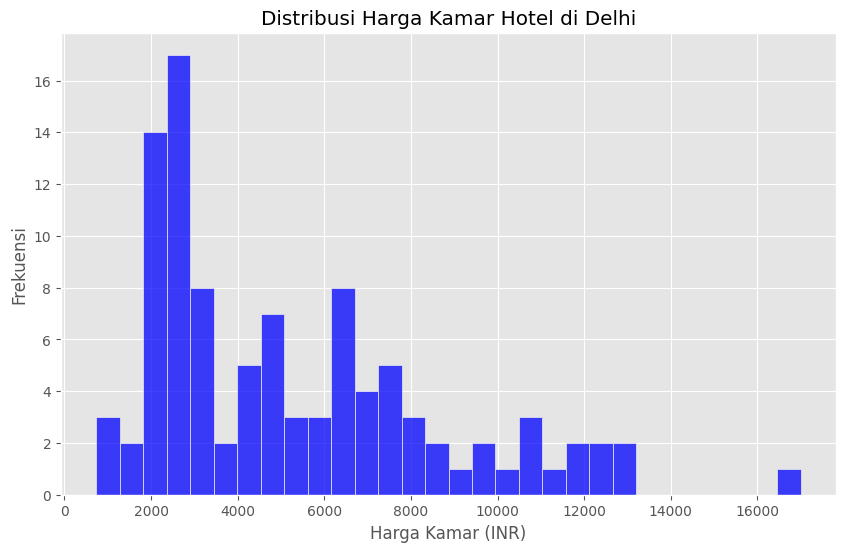

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(data['Price'], bins=30, color='blue')
plt.title('Distribusi Harga Kamar Hotel di Delhi')
plt.xlabel('Harga Kamar (INR)')
plt.ylabel('Frekuensi')
plt.show()

Distribusi frekuensi harga kamar menunjukkan mayoritas hotel di delhi menetapkan harga hotel di kisaran 2000-4000 INR yang dimana harga tersebut adalah harga yang paling umum. Namun, ada beberapa hotel dengan harga yang sangat mahal, mencapai 16.000 INR. Hal ini membuat grafik menunjukkan ekor panjang ke kanan, artinya harga-harga tinggi ini jarang ditemukan.

Jadi, kesimpulannya sebagian besar hotel di Delhi cocok untuk wisatawan dengan anggaran menengah, tetapi tetap ada beberapa hotel mewah untuk mereka yang mencari fasilitas premium.

BOXPLOT: Menampilkan distribusi harga berdasarkan lokasi

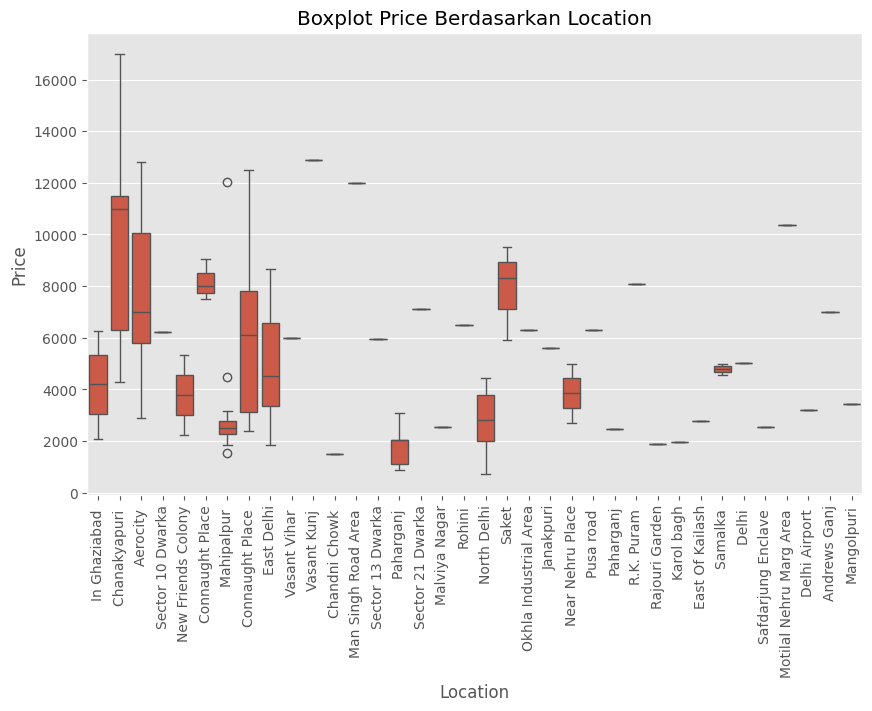

In [49]:

kolom_kategori = 'Location'  
kolom_numerik = 'Price'      

if kolom_kategori in data.columns and kolom_numerik in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=kolom_kategori, y=kolom_numerik, data=data)
    plt.xticks(rotation=90)  # Rotasi jika kategori banyak dan panjang
    plt.title(f'Boxplot {kolom_numerik.capitalize()} Berdasarkan {kolom_kategori.capitalize()}')
    plt.ylabel(kolom_numerik.capitalize())
    plt.xlabel(kolom_kategori.capitalize())
    plt.show()
else:
    print(f"Salah satu atau kedua kolom '{kolom_kategori}' atau '{kolom_numerik}' tidak ditemukan dalam dataset.")


Pada analisis disini, menunjukkan perbedaan harga kamar di berbagai lokasi di Delhi. Seperti Chanakyapuri, Connaught Place dan Aeorocity, yang memiliki harga yang lebih tinggi sedangkan lokasi seperti Chandni chowk cenderung memiliki harga yang lebih rendah dan lebih seragam.

SCATTER PLOT : Melihat apakah ada hubungan antara kolom Price dan Rating

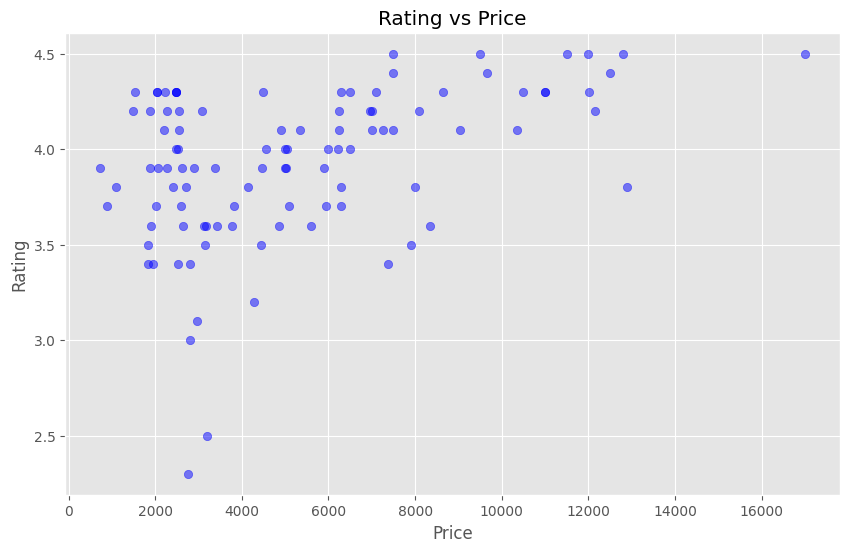

In [50]:
# Asumsikan dataset memiliki kolom 'price' dan 'rating'
kolom_x = 'Price'   # Variabel numerik pertama, misalnya harga
kolom_y = 'Rating'  # Variabel numerik kedua, misalnya rating


if kolom_x in data.columns and kolom_y in data.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(data[kolom_x], data[kolom_y], alpha=0.5, color='blue')
    plt.title(f'{kolom_y.capitalize()} vs {kolom_x.capitalize()}')
    plt.xlabel(kolom_x.capitalize())
    plt.ylabel(kolom_y.capitalize())
    plt.show()
else:
    print(f"Salah satu atau kedua kolom '{kolom_x}' atau '{kolom_y}' tidak ditemukan dalam dataset.")


Analisis ini menunjukkan adanya hubungan antara kolom Price dan Rating tetapi hubungan ini tidak terlalu kuat atau konsisten, yang dimana hotel dengan harga yang lebih tinggi cenderung memiliki rating yang lebih baik dan ada juga hotel murah dengan rating tinggi, dan beberapa hotel mahal memiliki rating rendah. Jadi, harga yang tinggi atau rendah tidak selalu mencerminkan kualitas. 

LINE PLOT : Mengamati tren harga rata-rata hotel berdasarkan lokasi di Delhi

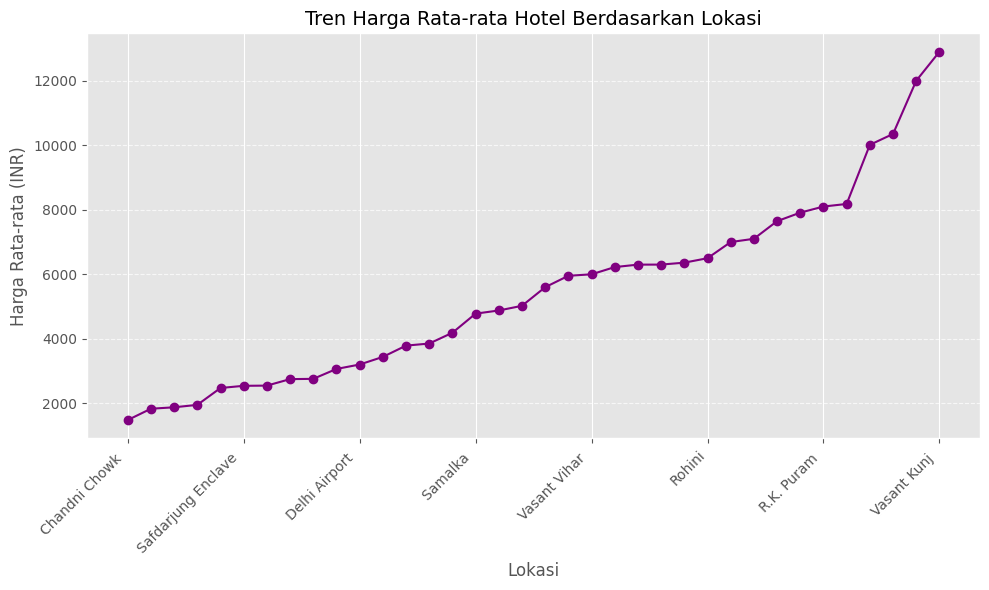

In [51]:
import matplotlib.pyplot as plt

# Grouping data by Location to analyze the average Price
location_price_trend = data.groupby('Location')['Price'].mean().sort_values()

# Plotting the trend
plt.figure(figsize=(10, 6))
location_price_trend.plot(kind='line', marker='o', color='purple')

# Customizing the plot
plt.title('Tren Harga Rata-rata Hotel Berdasarkan Lokasi', fontsize=14)
plt.xlabel('Lokasi', fontsize=12)
plt.ylabel('Harga Rata-rata (INR)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Jadi, analisis ini menunjukkan tren harga rata-rata hotel di berbagai lokasi di Delhi, seperti:

- Chandni Chowk memiliki harga hotel lebih murah, sedangkan Vasant Kunj jauh lebih mahal.

- Kenaikan harga di beberapa Lokasi seperti harga naik tajam dari R.K. Puram ke Vasant Kunj, menunjukkan bahwa lokasi premium cenderung lebih mahal.

- Wisatawan dengan anggaran terbatas bisa memilih lokasi seperti Chandni Chowk.



KESIMPULAN:

- Sebagian besar hotel di Delhi memiliki harga antara 2000-4000 INR, dengan beberapa lokasi premium lebih mahal.

- Harga hotel bervariasi tergantung lokasi, dengan area premium lebih mahal

- Ada hubungan antara harga dan rating, tapi tidak selalu konsisten. Harga tidak selalu mencerminkan kualitas.

- Hotel berbintang tinggi cenderung lebih mahal dan memiliki pajak lebih tinggi, namun rating dipengaruhi oleh faktor lain.


MODELING

Prediksi Klasifikasi Hotel Berdasarkan Fitur-Fitur Akhir dan Penilaian Pengguna

LABEL : 
- Very Good (1)
- Excellent (0)

1. MEMBERSIHKAN KOLOM DISTANCE TO LANDMARK MENJADI TIPE DATA NUMERIK (FLOAT)

In [52]:
import numpy as np

# Fungsi untuk membersihkan data
def clean_distance(value):
    if isinstance(value, str):  # Jika value adalah string
        value = value.strip()  # Hapus spasi di awal/akhir
        if 'km' in value:
            return float(value.replace('km', '').strip())  # Ubah '8.0 km' menjadi 8.0
        elif 'm' in value:
            return float(value.replace('m', '').strip()) / 1000  # Ubah '690 m' menjadi 0.69
    elif isinstance(value, (int, float)):  # Jika value sudah numerik
        return value
    return np.nan  # Jika format tidak dikenal, anggap sebagai NaN

# Terapkan fungsi pada kolom
df['Distance to Landmark'] = df['Distance to Landmark'].apply(clean_distance)

3. Validasi Hasil

Setelah membersihkan kolom, memastikan semua nilai sudah dalam format numerik (float):

In [53]:
print(df['Distance to Landmark'].dtype)  # Harus menunjukkan 'float64'
print(df['Distance to Landmark'].head())  # Menampilkan hasil konversi


float64
0    30.0
1    28.0
2     9.8
3     4.0
4    31.0
Name: Distance to Landmark, dtype: float64


Karena masih ada missing value jadi saya mengisi data kosong dengan median

In [54]:
df['Distance to Landmark'].fillna(df['Distance to Landmark'].median(), inplace=True)


C:\Users\Adinda puspitasari\AppData\Local\Temp\ipykernel_22744\2802414593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Distance to Landmark'].fillna(df['Distance to Landmark'].median(), inplace=True)


In [55]:
print(df.isnull().sum())

Hotel Name               0
Rating                   0
Rating Description       0
Reviews                  0
Star Rating             10
Location                 0
Nearest Landmark        33
Distance to Landmark     0
Price                    0
Tax                     38
dtype: int64


LANJUT MODELING

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Membaca Data dari Excel
# Ganti dengan path ke file Excel Anda
file_path = 'delhi.xlsx'

# Membaca data dari sheet pertama
df = pd.read_excel(file_path)

# 2. Data Cleaning
# Bersihkan kolom 'Distance to Landmark'
def clean_distance(value):
    if isinstance(value, str):  # Jika value adalah string
        value = value.strip()  # Hapus spasi di awal/akhir
        if 'km' in value:
            return float(value.replace('km', '').strip())  # Ubah '8.0 km' menjadi 8.0
        elif 'm' in value:
            return float(value.replace('m', '').strip()) / 1000  # Ubah '500 m' menjadi 0.5
    elif isinstance(value, (int, float)):  # Jika value sudah numerik
        return value
    return np.nan  # Jika format tidak dikenal, anggap sebagai NaN

df['Distance to Landmark'] = df['Distance to Landmark'].apply(clean_distance)

# Periksa missing values dan isi dengan median jika ada
df['Distance to Landmark'].fillna(df['Distance to Landmark'].median(), inplace=True)

# Filter data hanya untuk 'Very Good' dan 'Excellent'
df = df[df['Rating Description'].isin(['Very Good', 'Excellent'])]

# 3. Fitur dan Target
# Tentukan fitur (X) dan target (y)
X = df[['Rating', 'Reviews', 'Star Rating', 'Distance to Landmark', 'Price']]
y = df['Rating Description']

# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. Melatih model
rf_model.fit(X_train, y_train)

# 7. Evaluasi model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# 8. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




C:\Users\Adinda puspitasari\AppData\Local\Temp\ipykernel_22744\1989294673.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Distance to Landmark'].fillna(df['Distance to Landmark'].median(), inplace=True)


Test accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

   Excellent       1.00      1.00      1.00         8
   Very Good       1.00      1.00      1.00        20

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



EVALUASI

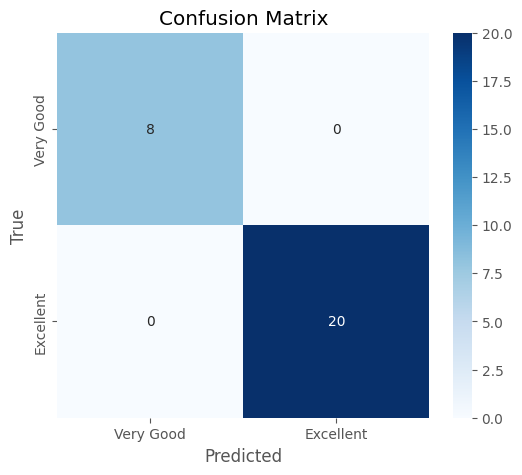

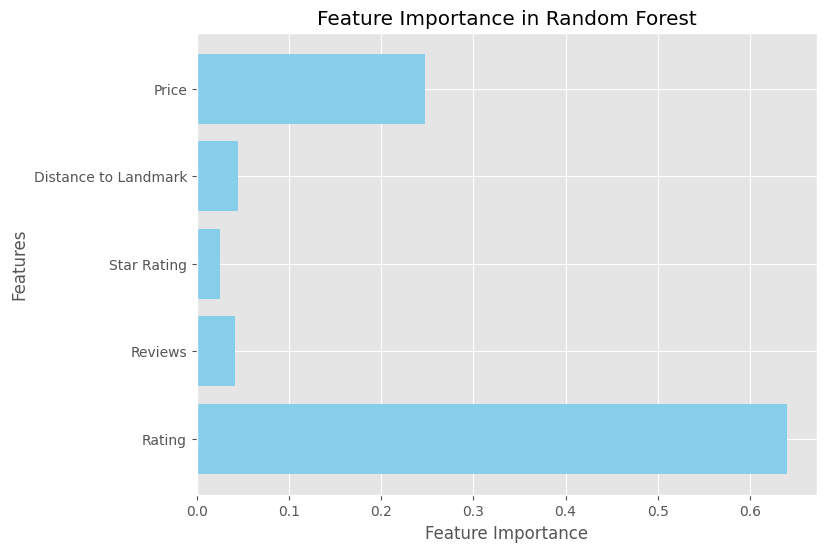

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 9. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Very Good', 'Excellent'], yticklabels=['Very Good', 'Excellent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 10. Feature Importance (seperti yang sebelumnya)
importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()


DEPLOYMENT

In [64]:
!pip install streamlit